C:\Users\dakoj\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50, 100)             │          50,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,651 (315.04 KB)

 Trainable params: 80,651 (315.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
75/75 - 21s - 286ms/step - accuracy: 0.8996 - loss: 0.2403 - val_accuracy: 0.9693 - val_loss: 0.0697
Epoch 2/100
75/75 - 13s - 167ms/step - accuracy: 0.9609 - loss: 0.0925 - val_accuracy: 0.9565 - val_loss: 0.0919
Epoch 3/100
75/75 - 21s - 274ms/step - accuracy: 0.9643 - loss: 0.0880 - val_accuracy: 0.9770 - val_loss: 0.0517
Epoch 4/100
75/75 - 13s - 167ms/step - accuracy: 0.9701 - loss: 0.0718 - val_accuracy: 0.9795 - val_loss: 0.0513
Epoch 5/100
75/75 - 12s - 165ms/step - accuracy: 0.9703 - loss: 0.0737 - val_accuracy: 0.9834 - val_loss: 0.0417
Epoch 6/100
75/75 - 12s - 165ms/step - accuracy: 0.9714 - loss: 0.0667 - val_accuracy: 0.9859 - val_loss: 0.0531
Epoch 7/100
75/75 - 12s - 165ms/step - accuracy: 0.9747 - loss: 0.0626 - val_accuracy: 0.9847 - val_loss: 0.0409
Epoch 8/100
75/75 - 21s - 274ms/step - accuracy: 0.9774 - loss: 0.0551 - val_accuracy: 0.9859 - val_loss: 0.0309
Epoch 9/100
75/75 - 12s - 164ms/step - accuracy: 0.9772 - loss: 0.0555 - val_accuracy: 0.97

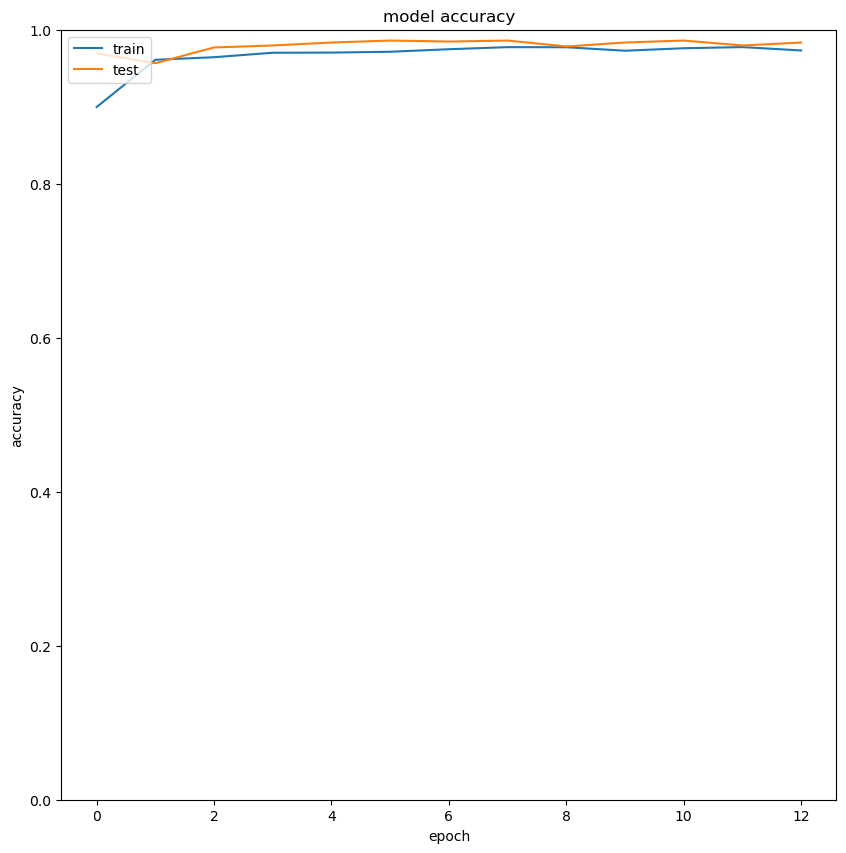

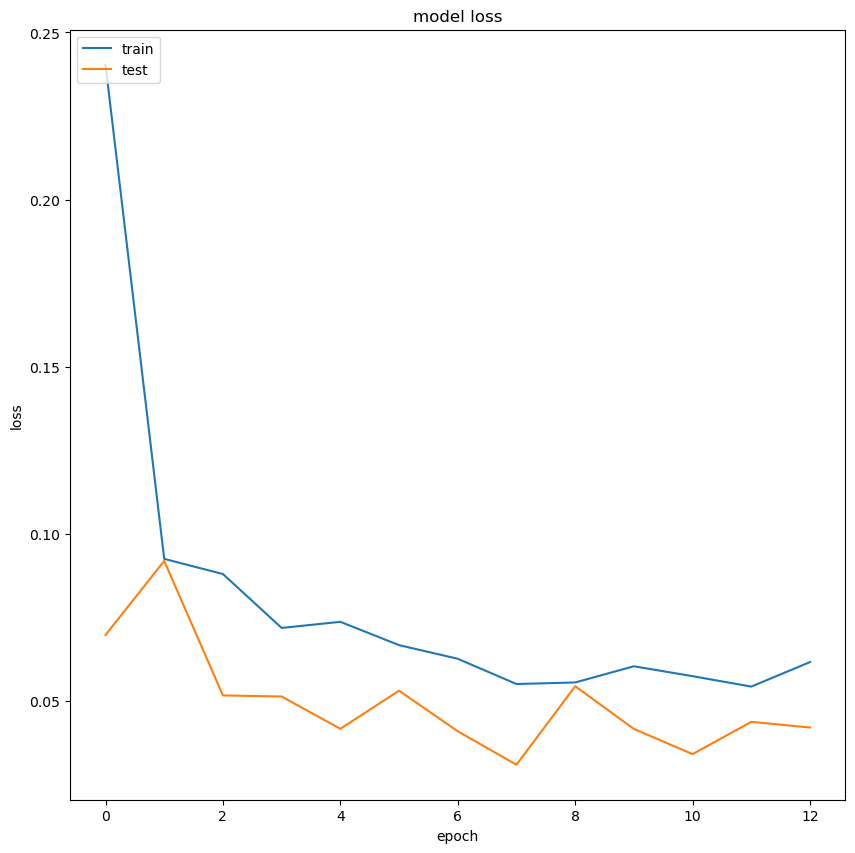

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9831 - loss: 0.0466
Accurracy: 0.9817669987678528
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels
[[12439    92]
 [  193  2907]]
precision =  0.9693231077025676 
 recall =  0.937741935483871
seq_array_test_last
[[[0.3505747  0.8333333  0.         ... 0.         0.4728682  0.45457056]
  [0.39655173 0.5833333  0.         ... 0.         0.6511628  0.5608948 ]
  [0.5114943  0.25       0.         ... 0.         0.6356589  0.4975145 ]
  ...
  [0.43678162 0.75       0.         ... 0.         0.41860464 0.4710025 ]
  [0.5804598  0.6666667  0.         ... 0.         0.3255814  0.45954156]
  [0.40804598 0.8333333  0.         ... 0.         0.6124031  0.52444077]]

 [[0.55172414 0.25       0.         ... 0.         0.5503876  0.6974593 ]
  [0.39655173 0.5833333  0.         ... 0.         0.37209302 0.59748685]
  [0.5344828  0.16666667 0.         ... 0.         0.51937985 0.602596  

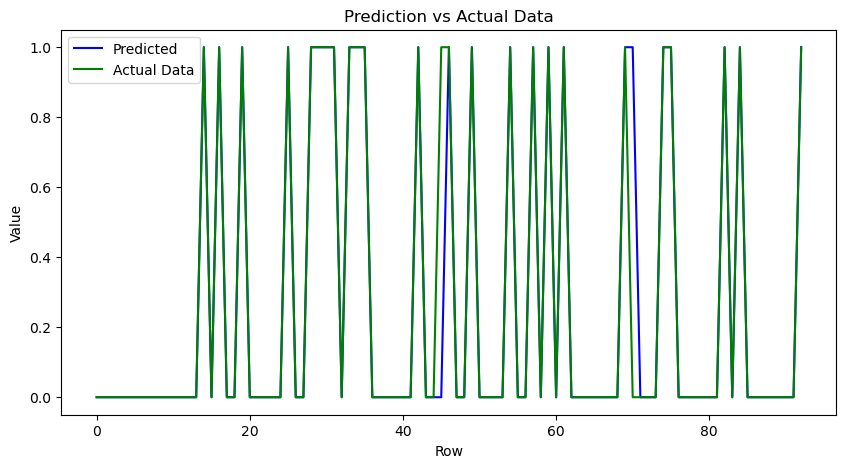

In [5]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Setting seed for reproducibility
np.random.seed(1234)
PYTHONHASHSEED = 0

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM

# define path to save model
model_path = 'Output/binary_model.keras'

##################################
# Data Ingestion
##################################

# read training data - It is the aircraft engine run-to-failure data.
train_df = pd.read_csv('PM_train.txt', sep=" ", header=None)
train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True)
train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

train_df = train_df.sort_values(['id','cycle'])

# read test data - It is the aircraft engine operating data without failure events recorded.
test_df = pd.read_csv('PM_test.txt', sep=" ", header=None)
test_df.drop(test_df.columns[[26, 27]], axis=1, inplace=True)
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

# read ground truth data - It contains the information of true remaining cycles for each engine in the testing data.
truth_df = pd.read_csv('PM_truth.txt', sep=" ", header=None)
truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)



#######
# TRAIN
#######
# Data Labeling - generate column RUL(Remaining Usefull Life or Time to Failure)
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
train_df = train_df.merge(rul, on=['id'], how='left')
train_df['RUL'] = train_df['max'] - train_df['cycle']
train_df.drop('max', axis=1, inplace=True)
# generate label columns for training data
# we will only make use of "label1" for binary classification,
# while trying to answer the question: is a specific engine going to fail within w1 cycles?
w1 = 30
w0 = 15
train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
train_df['label2'] = train_df['label1']
train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2

# MinMax normalization (from 0 to 1)
train_df['cycle_norm'] = train_df['cycle']
cols_normalize = train_df.columns.difference(['id','cycle','RUL','label1','label2'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]),
                             columns=cols_normalize,
                             index=train_df.index)
join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)

######
# TEST
######
# MinMax normalization (from 0 to 1)
test_df['cycle_norm'] = test_df['cycle']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]),
                            columns=cols_normalize,
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)


# We use the ground truth dataset to generate labels for the test data.
# generate column max for test data
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
truth_df.columns = ['more']
truth_df['id'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['more']
truth_df.drop('more', axis=1, inplace=True)

# generate RUL for test data
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)

# generate label columns w0 and w1 for test data
test_df['label1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df['label2'] = test_df['label1']
test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2

##################################
# LSTM
##################################

# pick a large window size of 50 cycles
sequence_length = 50

# function to reshape features into (samples, time steps, features)
def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    # for one id I put all the rows in a single matrix
    data_matrix = id_df[seq_cols].values
    num_elements = data_matrix.shape[0]
    # Iterate over two lists in parallel.
    # For example id1 have 192 rows and sequence_length is equal to 50
    # so zip iterate over two following list of numbers (0,112),(50,192)
    # 0 50 -> from row 0 to row 50
    # 1 51 -> from row 1 to row 51
    # 2 52 -> from row 2 to row 52
    # ...
    # 111 191 -> from row 111 to 191
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]

# pick the feature columns
sensor_cols = ['s' + str(i) for i in range(1,22)]
sequence_cols = ['setting1', 'setting2', 'setting3', 'cycle_norm']
sequence_cols.extend(sensor_cols)

# generator for the sequences
seq_gen = (list(gen_sequence(train_df[train_df['id']==id], sequence_length, sequence_cols))
           for id in train_df['id'].unique())

# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

# function to generate labels
def gen_labels(id_df, seq_length, label):
    # For one id I put all the labels in a single matrix.
    # For example:
    # [[1]
    # [4]
    # [1]
    # [5]
    # [9]
    # ...
    # [200]]
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    # I have to remove the first seq_length labels
    # because for one id the first sequence of seq_length size have as target
    # the last label (the previus ones are discarded).
    # All the next id's sequences will have associated step by step one label as target.
    return data_matrix[seq_length:num_elements, :]

# generate labels
label_gen = [gen_labels(train_df[train_df['id']==id], sequence_length, ['label1'])
             for id in train_df['id'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

# Next, we build a deep network.
# The first layer is an LSTM layer with 100 units followed by another LSTM layer with 50 units.
# Dropout is also applied after each LSTM layer to control overfitting.
# Final layer is a Dense output layer with single unit and sigmoid activation since this is a binary classification problem.
# build the network
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()

model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))
#add a dense layer(Last Option)
model.add(Dense(units=nb_out, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

# fit the network
history = model.fit(seq_array, label_array, epochs=100, batch_size=200, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)
                       ]
          )

# list all data in history
print(history.history.keys())

# summarize history for Accuracy
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.yticks([0, 0.20, 0.40, 0.60, 0.80, 1.0])
plt.show()
fig_acc.savefig("model_accuracy.png")

# summarize history for Loss
fig_acc = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig_acc.savefig("model_loss.png")

# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('Accurracy: {}'.format(scores[1]))

# make predictions and compute confusion matrix
y_pred_prob = model.predict(seq_array, verbose=1, batch_size=200)
y_pred = (y_pred_prob > 0.5).astype(int)
y_true = label_array

test_set = pd.DataFrame(y_pred)
test_set.to_csv('binary_submit_train.csv', index = None)

print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
print(cm)

# compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

##################################
# EVALUATE ON TEST DATA
##################################

# We pick the last sequence for each id in the test data

seq_array_test_last = [test_df[test_df['id']==id][sequence_cols].values[-sequence_length:]
                       for id in test_df['id'].unique() if len(test_df[test_df['id']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
print("seq_array_test_last")
print(seq_array_test_last)
print(seq_array_test_last.shape)

# Similarly, we pick the labels

#print("y_mask")
# serve per prendere solo le label delle sequenze che sono almeno lunghe 50
y_mask = [len(test_df[test_df['id']==id]) >= sequence_length for id in test_df['id'].unique()]
print("y_mask")
print(y_mask)
label_array_test_last = test_df.groupby('id')['label1'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)
print(label_array_test_last.shape)
print("label_array_test_last")
print(label_array_test_last)

# if best iteration's model was saved then load and use it
if os.path.isfile(model_path):
    estimator = load_model(model_path)

# test metrics
scores_test = estimator.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
print('Accurracy: {}'.format(scores_test[1]))

# make predictions and compute confusion matrix
y_pred_prob_test = estimator.predict(seq_array_test_last)#use only one record for testing
y_pred_test = (y_pred_prob_test > 0.5).astype(int)#print the values
y_true_test = label_array_test_last#print the values

test_set = pd.DataFrame(y_pred_test)
test_set.to_csv('binary_submit_test.csv', index = None)

print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true_test, y_pred_test)
print(cm)

# Plot in blue color the predicted data and in green color the
# actual data to visually verify the accuracy of the model.
fig_verify = plt.figure(figsize=(10, 5))  # Adjusted figsize
plt.plot(y_pred_test, color="blue")
plt.plot(y_true_test, color="green")
plt.title('Prediction vs Actual Data')
plt.ylabel('Value')
plt.xlabel('Row')
plt.legend(['Predicted', 'Actual Data'], loc='upper left')  # Adjusted legend label
plt.show()
fig_verify.savefig("model_verify.png")

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from keras.models import load_model

# Load the trained model
model_path = 'Output/binary_model.keras'
estimator = load_model(model_path)

# Set seed for reproducibility
np.random.seed(42)

# Generate random values for s1 to s21
sensor_values = np.random.rand(21)  # Generate 21 random values between 0 and 1

# Example manual input
manual_input = {
    'id': [1],
    'cycle': [150],
    'setting1': [0.5],
    'setting2': [0.7],
    'setting3': [0.8],
    # Add values for s1 to s21
    's1': [sensor_values[0]],
    's2': [sensor_values[1]],
    's3': [sensor_values[2]],
    's4': [sensor_values[3]],
    's5': [sensor_values[4]],
    's6': [sensor_values[5]],
    's7': [sensor_values[6]],
    's8': [sensor_values[7]],
    's9': [sensor_values[8]],
    's10': [sensor_values[9]],
    's11': [sensor_values[10]],
    's12': [sensor_values[11]],
    's13': [sensor_values[12]],
    's14': [sensor_values[13]],
    's15': [sensor_values[14]],
    's16': [sensor_values[15]],
    's17': [sensor_values[16]],
    's18': [sensor_values[17]],
    's19': [sensor_values[18]],
    's20': [sensor_values[19]],
    's21': [sensor_values[20]]
}

# Convert manual input to DataFrame
manual_df = pd.DataFrame(manual_input)

# Preprocess the manual input (normalize features)
manual_df['cycle_norm'] = manual_df['cycle']
cols_normalize = manual_df.columns.difference(['id', 'cycle', 'cycle_norm'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_manual_df = pd.DataFrame(min_max_scaler.fit_transform(manual_df[cols_normalize]),
                              columns=cols_normalize,
                              index=manual_df.index)
manual_df = manual_df.drop(columns=cols_normalize).join(norm_manual_df)

# Define sequence length
sequence_length = 50

# Generate sequence for the manual input
manual_seq = [manual_df[['setting1', 'setting2', 'setting3', 'cycle_norm'] + ['s{}'.format(i) for i in range(1, 22)]].values]

# Convert to numpy array
manual_seq_array = np.asarray(manual_seq).astype(np.float32)

# Use the trained model for prediction
manual_prediction_prob = estimator.predict(manual_seq_array)
manual_prediction = (manual_prediction_prob > 0.5).astype(int)

print("Manual Input Prediction Probability:", manual_prediction_prob)
print("Manual Input Prediction:", manual_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
Manual Input Prediction Probability: [[0.22579382]]
Manual Input Prediction: [[0]]


In [ ]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import numpy as np
from sklearn import preprocessing
from keras.models import load_model
import pandas as pd

# Load the trained model
model_path = 'Output/binary_model.keras'
estimator = load_model(model_path)

# Function to handle prediction
def predict_manual_input():
    try:
        # Get input values from the entry widgets
        cycle = float(cycle_entry.get())
        setting1 = float(setting1_entry.get())
        setting2 = float(setting2_entry.get())
        setting3 = float(setting3_entry.get())
        
        # Generate random values for s1 to s21
        np.random.seed(42)
        sensor_values = np.random.rand(21)
        
        # Create manual input data
        manual_input = {
            'cycle': [cycle],'setting1': [setting1],'setting2': [setting2],'setting3': [setting3],
            's1': [sensor_values[0]],'s2': [sensor_values[1]],'s3': [sensor_values[2]],'s4': [sensor_values[3]],'s5': [sensor_values[4]],
            's6': [sensor_values[5]],'s7': [sensor_values[6]],'s8': [sensor_values[7]],'s9': [sensor_values[8]],'s10': [sensor_values[9]],
            's11': [sensor_values[10]],'s12': [sensor_values[11]],'s13': [sensor_values[12]],'s14': [sensor_values[13]],'s15': [sensor_values[14]],
            's16': [sensor_values[15]],'s17': [sensor_values[16]],'s18': [sensor_values[17]],'s19': [sensor_values[18]],
            's20': [sensor_values[19]],'s21': [sensor_values[20]]
        }

        # Convert manual input to DataFrame
        manual_df = pd.DataFrame(manual_input)

        # Preprocess the manual input (normalize features)
        manual_df['cycle_norm'] = manual_df['cycle']
        cols_normalize = manual_df.columns.difference(['cycle', 'cycle_norm'])
        min_max_scaler = preprocessing.MinMaxScaler()
        norm_manual_df = pd.DataFrame(min_max_scaler.fit_transform(manual_df[cols_normalize]),
                                      columns=cols_normalize,
                                      index=manual_df.index)
        manual_df = manual_df.drop(columns=cols_normalize).join(norm_manual_df)

        # Define sequence length
        sequence_length = 50

        # Generate sequence for the manual input
        manual_seq = [manual_df[['setting1', 'setting2', 'setting3', 'cycle_norm'] + ['s{}'.format(i) for i in range(1, 22)]].values]

        # Convert to numpy array
        manual_seq_array = np.asarray(manual_seq).astype(np.float32)

        # Use the trained model for prediction
        manual_prediction_prob = estimator.predict(manual_seq_array)

        # Show prediction probability
        prediction_label.config(text=f"Prediction Probability: {manual_prediction_prob[0][0]}")
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numerical values.")

# Create the main window
root = tk.Tk()
root.title("Engine Failure Prediction")

# Create labels and entry widgets for input
tk.Label(root, text="Cycle:").grid(row=0, column=0, padx=5, pady=5)
cycle_entry = tk.Entry(root)
cycle_entry.grid(row=0, column=1, padx=5, pady=5)

tk.Label(root, text="Setting 1:").grid(row=1, column=0, padx=5, pady=5)
setting1_entry = tk.Entry(root)
setting1_entry.grid(row=1, column=1, padx=5, pady=5)

tk.Label(root, text="Setting 2:").grid(row=2, column=0, padx=5, pady=5)
setting2_entry = tk.Entry(root)
setting2_entry.grid(row=2, column=1, padx=5, pady=5)

tk.Label(root, text="Setting 3:").grid(row=3, column=0, padx=5, pady=5)
setting3_entry = tk.Entry(root)
setting3_entry.grid(row=3, column=1, padx=5, pady=5)

# Create button to predict
predict_button = ttk.Button(root, text="Predict", command=predict_manual_input)
predict_button.grid(row=4, columnspan=2, padx=5, pady=5)

# Label to display prediction probability
prediction_label = tk.Label(root, text="")
prediction_label.grid(row=5, columnspan=2, padx=5, pady=5)

# Start the GUI event loop
root.mainloop()
